In [24]:
import pandas as pd 
import random as randn
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns
from matplotlib import font_manager, rc

In [32]:
data = pd.read_csv("TimeGender.csv")
data

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,female,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,female,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,female,3939,17


In [26]:
# 한글 폰트 사용
def font_refresh():
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)

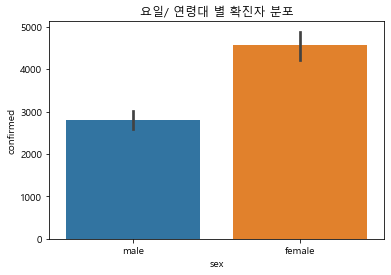

In [27]:
font_refresh()
#plt.figure(figsize = (16,6))
sns.barplot(x="sex", y="confirmed",data=data)
plt.title("요일/ 연령대 별 확진자 분포")
plt.show()

In [35]:
dict_date = {}
date_index = data.date.unique()
dayOfTheWeek = ["MON", "TUE", "WED", "THU", "FRU", "SAT", "SUN"]

for i in range(len(date_index)):
    date_time = datetime.datetime.strptime(date_index[i],'%Y-%m-%d')
    DayWeek = dayOfTheWeek[date_time.weekday()]
    dict_date[date_time] = DayWeek

In [40]:
data['date'] = pd.to_datetime(data['date'])

day_list = []
for i in range(len(data.date)):
    day_list.append(dict_date[data.date[i]])
data['dayOfTheWeek'] = day_list

In [45]:
data1 = data.groupby(['sex','dayOfTheWeek']).sum()
data1 = data1.reset_index()

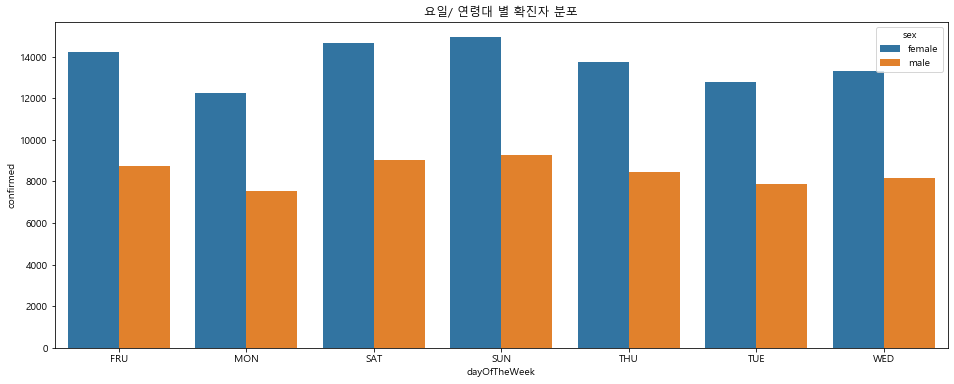

In [47]:
font_refresh()
plt.figure(figsize = (16,6))
sns.barplot(x="dayOfTheWeek", y="confirmed",hue= 'sex',data=data1)
plt.title("요일/ 연령대 별 확진자 분포")
plt.show()

In [58]:
sex_data = data.groupby(['sex','date']).sum()
sex_data = sex_data.reset_index()
sex_data = sex_data.set_index('sex')

In [52]:
# plotly 시각화 라이브러리 seaborn, matplotlib보다 깔금, animation 효과도 줄 수 있음 
# https://dailyheumsi.tistory.com/118#%EC%84%B8%EB%A0%A8%EB%90%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%8C%A8%ED%82%A4%EC%A7%80,-plotly.
# https://dacon.io/competitions/official/235590/codeshare/900

time  confirmed  deceased
sex    date                                 
female 2020-03-02     0       2621         9
       2020-03-03     0       3002        12
       2020-03-04     0       3332        12
       2020-03-05     0       3617        14
       2020-03-06     0       3939        17
       2020-03-07     0       4245        18
       2020-03-08     0       4440        20
       2020-03-09     0       4583        20
       2020-03-10     0       4661        21
       2020-03-11     0       4808        25
       2020-03-12     0       4875        28
       2020-03-13     0       4936        28
       2020-03-14     0       4986        31
       2020-03-15     0       5026        34
       2020-03-16     0       5067        34
       2020-03-17     0       5120        37
       2020-03-18     0       5173        39
       2020-03-19     0       5269        42
       2020-03-20     0       5322        43
       2020-03-21     0       5412        48
       2020-03-22     0       5467        49
male   2020-03-02     0       1591        13
       2020-03-03     0       1810        16
       2020-03-04     0       1996        20
       2020-03-05     0       2149        21
       2020-03-06     0       2345        25
       2020-03-07     0       2522        26
       2020-03-08     0       2694        29
       2020-03-09     0       2799        31
       2020-03-10     0       2852        33
       2020-03-11     0       2947        35
       2020-03-12     0       2994        38
       2020-03-13     0       3043        39
       2020-03-14     0       3100        41
       2020-03-15     0       3136        41
       2020-03-16     0       3169        41
       2020-03-17     0       3200        44
       2020-03-18     0       3240        45
       2020-03-19     0       3296        49
       2020-03-20     0       3330        51
       2020-03-21     0       3387        54
       2020-03-22     0       3430        55